In [4]:
import pytorch_lightning as pl
import torch
from torchvision import datasets, transforms
import autoencoder_classifier as aec


# Define transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

testset = datasets.FashionMNIST(root='./data', train=False,
                                download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                        shuffle=False, num_workers=16)                      




# Load the saved model from checkpoint
checkpoint_path = './checkpoints/epoch=7-step=15000.ckpt'
model = torch.load(checkpoint_path)

# Evaluate the model
model = aec.AutoencoderClassifier(num_classes=10)
model = model.load_from_checkpoint(checkpoint_path=checkpoint_path, num_classes=10)


images, labels = next(iter(testloader))

# Get the model predictions
reconstructed, classified = model(images)



In [2]:
print(images.shape)
print(reconstructed.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])


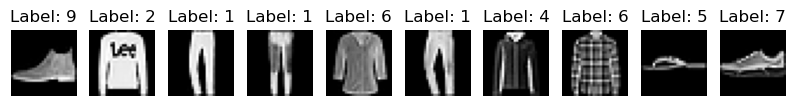

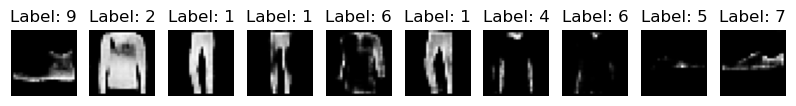

In [5]:
import matplotlib.pyplot as plt

def plot_images(images, labels, num_images=10):
    fig, axs = plt.subplots(1, num_images, figsize=(10, 5))
    axs = axs.flatten()

    for i in range(num_images):
        # Denormalize the image tensor and convert to a NumPy array
        image = images[i].numpy().squeeze()
        image = image / 2 + 0.5

        # Plot the image and label
        axs[i].imshow(image, cmap='gray')
        axs[i].set_title(f'Label: {labels[i]}')
        axs[i].axis('off')

    plt.show()

plot_images(images, labels, num_images=10)
plot_images(reconstructed.detach(), torch.argmax(classified, dim=1), num_images=10)

In [55]:
predicted = torch.argmax(classified, dim=1)